Họ và tên:  Bùi Hoàng Phi  
MSSV:       2011799
# **Xử lí ảnh số và thị giác máy tính**
**Project 4: Transformations**

# Công thức

Với project 4, tôi sẽ nêu ra và thực hiện 5 phép biến đổi. Bao gồm: translation, Euclidean, similarity, affline và projective
## Công thức cho phép biến đổi translation

Với $t_x$ và $t_y$ là các giá trị độ dời tương ứng hai trục $Ox$ và $Oy$, ta có:
$$
    \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \begin{bmatrix}x + t_x \\ y + t_y \\ 1 \end{bmatrix}\\
$$

## Công thức cho phép biến đổi Euclidean

Với $\theta$ là giá trị góc xoay của theo hướng ngược chiều kim đồng hồ, ta có:
$$
    \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} cos(\theta) & -sin(\theta) & t_x \\ sin(\theta) & cos(\theta) & t_y \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \begin{bmatrix}cos(\theta)x - sin(\theta)y + t_x \\ sin(\theta)x + cos(\theta)y  + t_y \\ 1 \end{bmatrix}\\
$$

## Công thức cho phép biến đổi similarity

Với $s$, $\theta$, $t_x$ và $t_y$ là các giá trị tương ứng với mức độ phóng đại, góc xoay theo hướng ngược chiều kim đồng hồ và độ dời tương ứng hai trục $Ox$ và $Oy$, ta có:
$$
    \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} s & 0 & 0 \\ 0 & s & 0 \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} cos(\theta) & -sin(\theta) & t_x \\ sin(\theta) & cos(\theta) & t_y \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \begin{bmatrix} s\cdot cos(\theta) & -s\cdot sin(\theta) & s\cdot t_x \\ s\cdot sin(\theta) & s\cdot cos(\theta) & s\cdot t_y \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \begin{bmatrix}s\cdot (cos(\theta)x - sin(\theta)y + t_x) \\ s\cdot (sin(\theta)x + cos(\theta)y  + t_y) \\ 1 \end{bmatrix}\\
$$

## Công thức cho phép biến đổi affline

Với $a$, $b$, $c$, $d$, $e$, $f$ là các tham số của ma trận biến đổi affline , ta có:
$$
    \begin{bmatrix}x' \\ y' \\ w \end{bmatrix} = \begin{bmatrix} a & b & c \\ d & e & f\\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ w \end{bmatrix}\\
$$

## Công thức cho phép biến đổi projective

Với $a$, $b$, $c$, $d$, $e$, $f$, $g$, $h$, $i$ là các tham số trong ma trận biến đổi projective , ta có:
$$
    \begin{bmatrix}x' \\ y' \\ w \end{bmatrix} = \begin{bmatrix} a & b & c \\ d & e & f\\ g & h & i \end{bmatrix}\begin{bmatrix}x \\ y \\ w \end{bmatrix}
$$

# Hiện thực

In [84]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
import string
from math import cos,sin,pi

In [85]:
def draw_points(points, title, width=10, height=10, color='b') :
    plt.figure()
    axes = plt.gca()
    
    x_coordinates = []
    y_coordinates = []
    alphabet = list(string.ascii_lowercase)
    
    i = 0
    for point in points : 
        x, y, k = point
        x_coordinates.append(x)
        y_coordinates.append(y)
        plt.annotate(alphabet[i], (x, y))
        i += 1
    
    x_coordinates.append(x_coordinates[0])
    y_coordinates.append(y_coordinates[0])
    
    plt.scatter(x_coordinates, y_coordinates, c=color, edgecolors=color)
    plt.plot(x_coordinates, y_coordinates)
    axes.set_xticks(np.arange(-2, width, 1))
    axes.set_yticks(np.arange(-2, height, 1))
    axes.set_aspect('equal')
    plt.title(title)
    plt.grid()

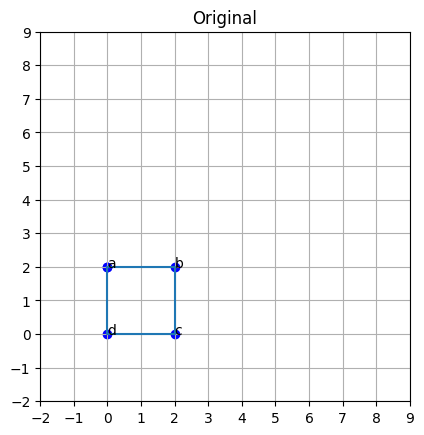

In [86]:
a = (0, 2, 1)
b = (2, 2, 1)
c = (2, 0, 1)
d = (0, 0, 1)

shape = np.array([a, b, c, d])
draw_points(shape, 'Original')

In [87]:
## Translation
def traslation(matrix, tx, ty) :
    traslation_matrix = np.array([[1, 0, tx], 
                               [0, 1, ty], 
                               [0, 0, 1]])
    
    result = []
    for point in matrix :
        spoint = traslation_matrix @ point
        result.append(spoint)
        
    return np.array(result)

In [88]:
## Euclidean
def euclidean(matrix, r, tx, ty):
    sin = np.sin(r)
    cos = np.cos(r)
    
    euclidean_matrix = np.array([[cos, -sin, tx], 
                                [sin, cos, ty], 
                                [0, 0, 1]])
    
    result = []
    for point in matrix :
        rotated_point = euclidean_matrix @ point
        result.append(rotated_point)
        
    return np.array(result)

In [89]:
## Similarity
def similarity(matrix, s, r, tx, ty):
    scaling_matrix = np.array([[s, 0, 0], 
                                [0, s, 0], 
                                [0, 0, 1]])
    sin = np.sin(r)
    cos = np.cos(r)
    euclidean_matrix = np.array([[cos, -sin, tx], 
                                [sin, cos, ty], 
                                [0, 0, 1]])
    
    result = []
    for point in matrix :
        similarity_point = scaling_matrix @ euclidean_matrix @ point
        result.append(similarity_point)
        
    return np.array(result)

In [90]:
## Affline
def affline(matrix, a, b, c, d, e, f):
    affline_matrix = np.array([[a, b, c], 
                                [d, e, f], 
                                [0, 0, 1]])

    result = []
    for point in matrix :
        affline_point = affline_matrix @ point
        result.append(affline_point)
    return np.array(result)

In [91]:
## Projective
def projective(matrix, a, b, c, d, e, f, g, h, i):
    projective_matrix = np.array([[a, b, c], 
                                [d, e, f], 
                                [g, h, i]])

    result = []
    for point in matrix :
        projected_point = []
        x, y, w = projective_matrix @ point
        projected_point.append(x / w)
        projected_point.append(y / w)
        projected_point.append(w)
        result.append(projected_point)
    return np.array(result)

# Kết quả

Kết quả với phép translation với $t_x = 2$ và $t_y = 2$

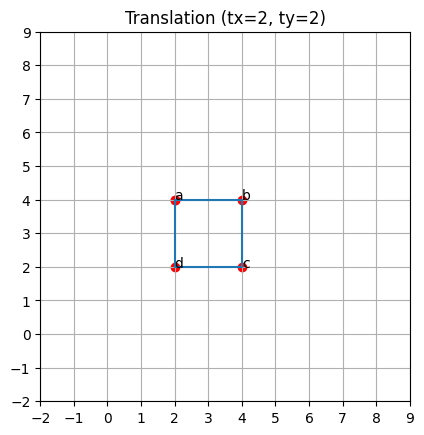

In [92]:
transformed_square = traslation(shape, 2, 2)
draw_points(transformed_square, 'Translation (tx=2, ty=2)', color='r')

Kết quả với phép Euclidean với $\theta = pi/4$, $t_x = 2$ và $t_y = 2$

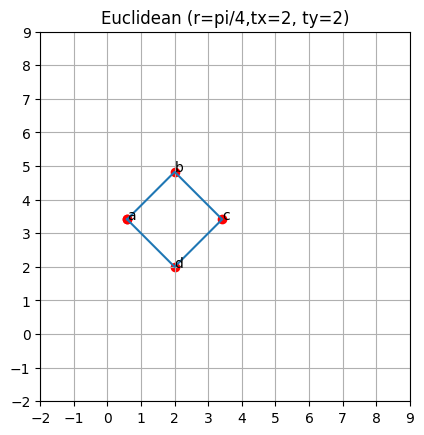

In [93]:
transformed_square = euclidean(shape, pi/4, 2, 2)
draw_points(transformed_square, 'Euclidean (r=pi/4,tx=2, ty=2)', color='r')

Kết quả với phép similarity với $s=2$, $\theta = pi/4$, $t_x = 2$ và $t_y = 2$

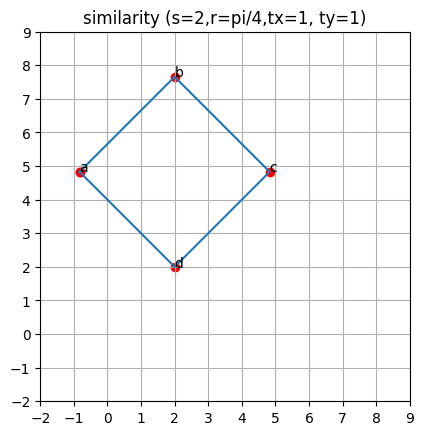

In [94]:
transformed_square = similarity(shape, 2, pi/4, 1, 1)
draw_points(transformed_square, 'similarity (s=2,r=pi/4,tx=1, ty=1)', color='r')

Kết quả với phép affline với $a=1$, $b=2$, $c=3$, $d=2$, $e=1$, $f=1$

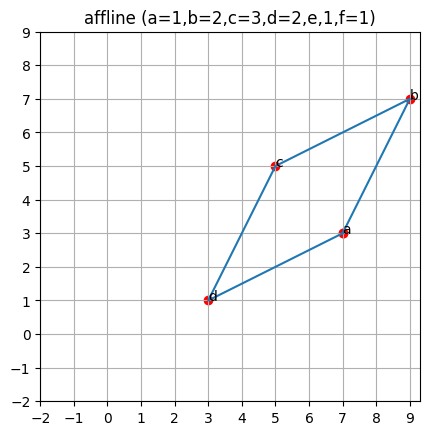

In [95]:
transformed_square = affline(shape, 1 , 2, 3, 2, 1, 1)
draw_points(transformed_square, 'affline (a=1,b=2,c=3,d=2,e,1,f=1)', color='r')

Kết quả với phép projective với $a=1$, $b=2$, $c=3$, $d=2$, $e=1$, $f=1$, $g=0.2$, $h=-0.05$, $i=1$

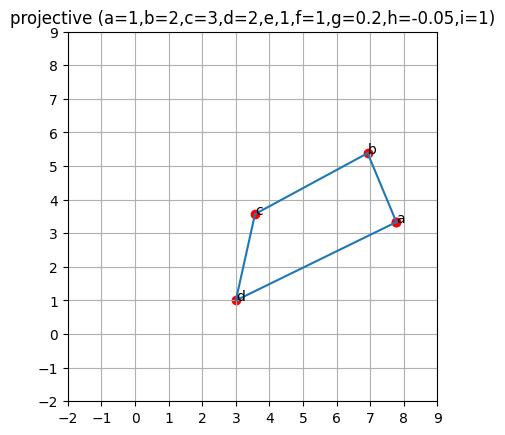

In [96]:
transformed_square = projective(shape, 1 , 2, 3, 2, 1, 1, 0.2, -0.05, 1)
draw_points(transformed_square, 'projective (a=1,b=2,c=3,d=2,e,1,f=1,g=0.2,h=-0.05,i=1)', color='r')

## So sánh phép biến đổi affline và projective

<table>
<tbody>
<tr style="height: 23px;border: 1px solid black;">
<th style="height: 23px;border: 1px solid black;">&nbsp;</td>
<th style="height: 23px;border: 1px solid black; width: 150px; text-align: center">&nbsp;Affine</td>
<th style="height: 23px;border: 1px solid black; width: 150px; text-align: center">&nbsp;Projective</td>
</tr>

<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black; width: 250px">&nbsp;Các đường thẳng song song vẫn song song sau khi biến đổi</td>
<td style="height: 23px;border: 1px solid black; text-align: center">&nbsp;Có</td>
<td style="height: 23px;border: 1px solid black; text-align: center">&nbsp;Có hoặc không</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black;">&nbsp;Tỉ lệ giữ nguyên sau khi biến đổi</td>
<td style="height: 23px;border: 1px solid black; text-align: center">&nbsp;Có</td>
<td style="height: 23px;border: 1px solid black; text-align: center">&nbsp;Không</td>
</tr>
</tbody>
</table>

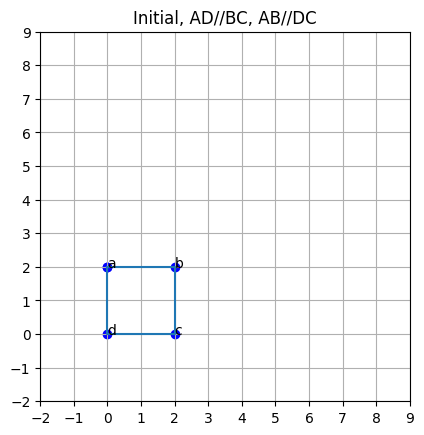

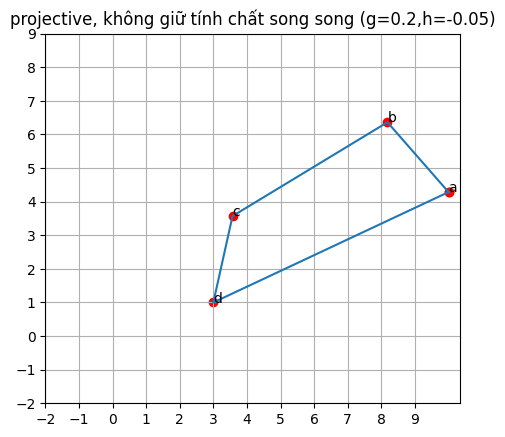

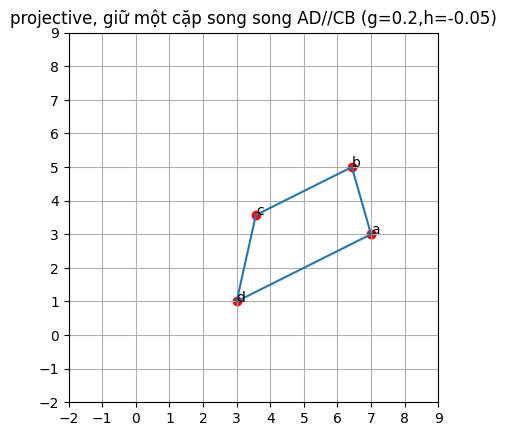

In [97]:
# Ví dụ cho Projective có thể giữ nguyên tính chất song song
draw_points(shape, 'Initial, AD//BC, AB//DC')
transformed_square = projective(shape, 1 , 2, 3, 2, 1, 1, 0.2, -0.15, 1)
draw_points(transformed_square, 'projective, không giữ tính chất song song (g=0.2,h=-0.05)', color='r')
transformed_square = projective(shape, 1 , 2, 3, 2, 1, 1, 0.2, 0, 1)
draw_points(transformed_square, 'projective, giữ một cặp song song AD//CB (g=0.2,h=-0.05)', color='r')

# Nhận xét, kết luận

## Nhận xét
- Bài tập này, tôi đã thực hiện các phép biến đổi bao gồm traslation, Euclidean, similarity, affline và projective, kết quả khi thực hiện vẽ các điểm trên đồ thị và tính toán thực hiện tương đối khả quan.
- Hầu hết các phép biến đổi có thể được thực hiện thông qua 4 phép biến đổi cơ bản là translate, scale, rotation và shear. Ma trận biến đổi có thể khác nhau tuỳ thuộc vào thứ tự nhân của các ma trận phép biến đổi cơ bản. Ví dụ ma trận phép similarity là tích của 3 ma trận theo thứ tự rotation, translation, scale, phép affline tương tự phép similarity nhưng khác về tỉ lệ với trục $Ox$ và $Oy$ còn phép projective là ma trận affline nhân với ma trận có dạng
$$
    \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0\\ g & h & 1 \end{bmatrix}
$$
với $g$ và $h$ là tỉ lệ chiếu. Tuy nhiên project này chưa thực hiện kiểm chứng nhận xét trên.
## Kết luận
- Với bài tập này, các nhiệm vụ bao gồm hiện thực các phép biến đổi, so sánh phép biến đổi affline và projective, ghép hình ảnh vào mặt phẳng cho trước chưa hoàn thành toàn bộ. Hiện tại, bài tập mới chỉ giải quyết trên đồ thị, chưa sử dụng ảnh thực tế. Trong tương lai, tôi sẽ cố gắng nghiên cứu sâu hơn và hoàn thiện các phép biến đổi.

# Repository

https://github.com/phii-1003/XLAS.git
(folder project4)